<a href="https://colab.research.google.com/github/electrolabopen/Facedetectorcolab/blob/master/FaceMaskDetectiononcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/aieml/face-mask-detection-keras.git
!1s

fatal: destination path 'face-mask-detection-keras' already exists and is not an empty directory.
/bin/bash: 1s: command not found


In [8]:
import cv2,os

data_path='/content/observations/experiements/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [0]:
!git clone https://github.com/prajnasb/observations.git


In [0]:
data=[]
target=[]
img_size=100


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name) #folder_path
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [0]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [0]:
np.save('data',data)
np.save('target',new_target)

In [0]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 7s 8ms/step - loss: 0.6894 - accuracy: 0.5737 - val_loss: 0.6730 - val_accuracy: 0.5121
Epoch 2/20
990/990 [==============================] - 1s 803us/step - loss: 0.5976 - accuracy: 0.6808 - val_loss: 0.4663 - val_accuracy: 0.8589
Epoch 3/20
990/990 [==============================] - 1s 818us/step - loss: 0.4242 - accuracy: 0.8212 - val_loss: 0.3275 - val_accuracy: 0.9153
Epoch 4/20
990/990 [==============================] - 1s 806us/step - loss: 0.2888 - accuracy: 0.8879 - val_loss: 0.1958 - val_accuracy: 0.9435
Epoch 5/20
990/990 [==============================] - 1s 836us/step - loss: 0.2032 - accuracy: 0.9273 - val_loss: 0.1779 - val_accuracy: 0.9395
Epoch 6/20
990/990 [==============================] - 1s 875us/step - loss: 0.1600 - accuracy: 0.9404 - val_loss: 0.1532 - val_accuracy: 0.9516
Epoch 7/20
990/990 [==============================] - 1s 818us/step - loss: 0.1430 - accurac

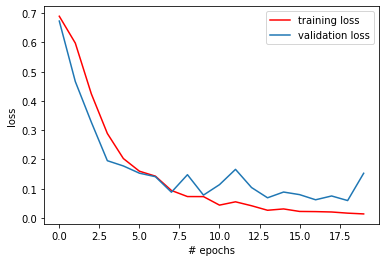

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


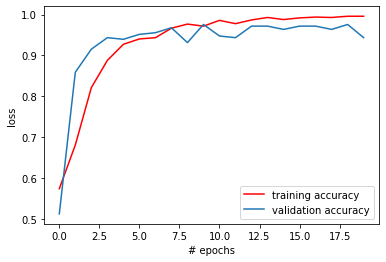

In [17]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 613us/step
[0.30515542043292004, 0.9420289993286133]


# **Detectar mascarilla en imagenes.**

In [0]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [0]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('/content/face-mask-detection-keras/haarcascade_frontalface_default.xml')

img=cv2.imread("/content/sample_data/fe2a0ab0-0238-4d64-bf12-1d1008efb9fb.jpg")

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [0]:


img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_clsfr=cv2.CascadeClassifier('/content/face-mask-detection-keras/haarcascade_frontalface_default.xml')

faces=face_clsfr.detectMultiScale(gray,1.3,5)
    
  



In [0]:
for (x,y,w,h) in faces:


    
  face_img=img_cvt[y:y+w,x:x+w]
  resized=cv2.resize(face_img,(100,100))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)

  label=np.argmax(result,axis=1)[0]
      
  cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
  cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
  cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)  

Para Dectar mascarillas en un video.

In [0]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


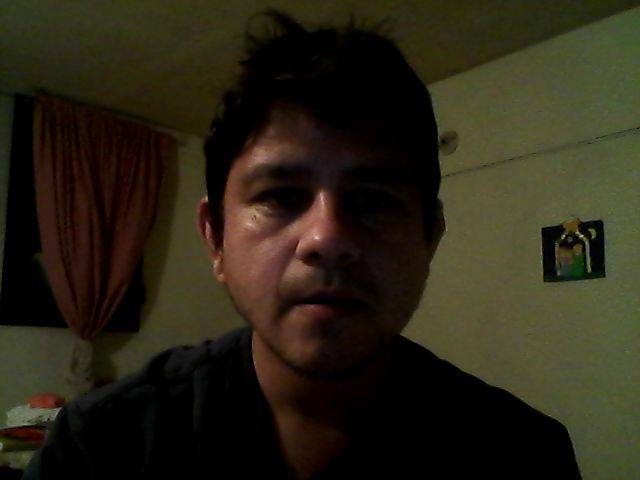

In [48]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))